In [19]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures,OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, cross_validate
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score

In [3]:
df = pd.read_csv('dataset.csv')
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)

In [4]:
# Définir les tranches de BMI
bins = [0, 18.5, 24.9, 29.9, 40, 100]  # Tranches de BMI
labels = ['Sous-poids', 'Poids normal', 'Surpoids', 'Obésité', 'Obésité sévère']

# Ajouter une nouvelle colonne dans le DataFrame pour les tranches de BMI
df["BMI_category"] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

In [5]:
df.drop('index', axis=1, inplace=True)

In [6]:
features_of_interest = df.drop('charges', axis=1).columns

numerical_column = ['age', 'bmi','children']

ordinal_column = ['sex','smoker','BMI_category']

categorical_column = ['region']

target_name = 'charges'
data, target, numerical_data, ordinal_data, categorical_data = (
    df[features_of_interest],
    df[target_name],
    df[numerical_column],
    df[ordinal_column],
    df[categorical_column]
)

In [43]:
preprocessor = ColumnTransformer([('categorical', OneHotEncoder(), categorical_column),
                                 ("ordinal", OrdinalEncoder(), ordinal_column),
                                 ('numeric', StandardScaler(), numerical_column)],
                                 remainder="passthrough")

model = make_pipeline(preprocessor,PolynomialFeatures(),LinearRegression())
model.fit(data,target)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OneHotEncoder(), ['region']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['sex', 'smoker',
                                                   'BMI_category']),
                                                 ('numeric', StandardScaler(),
                                                  ['age', 'bmi',
                                                   'children'])])),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [44]:
X_train, X_test, y_train, y_test =train_test_split(data,target,random_state=42, test_size=0.15, stratify=df[['smoker']])
# line_reg.fit(df_2.drop(['charges', 'children', 'northeast','northwest','southeast','southwest'], axis=1), df_2['charges'])
model.fit(X_train,y_train)
y_pred = model.predict(X_train)

print(f"Mean squared error: {np.sqrt(mean_squared_error(y_train, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_train, y_pred):.5f}")


Mean squared error: 4543.53
Coefficient of determination: 0.85936


In [45]:
y_pred = model.predict(X_test)

print(f"Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.5f}")

Mean squared error: 3529.05
Coefficient of determination: 0.91406


In [46]:
residu = y_pred - y_test

<Axes: >

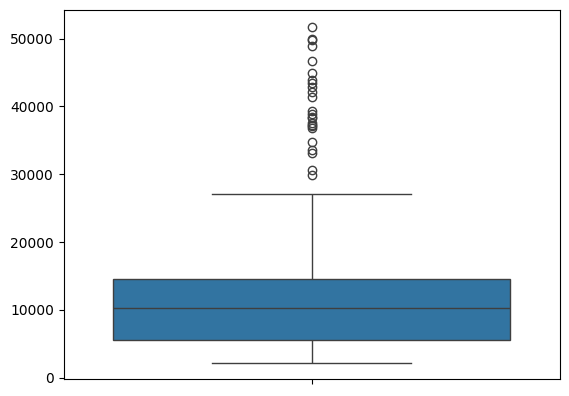

In [47]:
sns.boxplot(y_pred)

In [48]:
model[-1].coef_

array([-6.02445742e-13,  4.47604476e+02,  1.38196211e+01,  1.05778935e+02,
       -5.67203032e+02, -2.87970700e+02,  1.26765631e+04, -7.51701474e+02,
        2.68694905e+03,  1.05880069e+02,  7.91514127e+02,  4.47604476e+02,
        1.81898940e-12,  2.50111043e-12, -2.47268872e-12, -4.26568566e+02,
        2.64273741e+03, -4.09931448e+01,  2.67180810e+02,  7.01227964e+02,
        3.45539557e+02,  1.38196211e+01, -2.72848411e-12,  3.18323146e-12,
        2.21249949e+02,  4.00992583e+03, -3.14093548e+02,  5.33133432e+02,
       -1.99642450e+02,  5.41440876e+02,  1.05778935e+02,  1.81898940e-12,
       -1.62294738e+01,  2.62667826e+03, -4.27187546e+02,  1.07134646e+03,
       -5.00559137e+02, -4.97125203e+01, -5.67203032e+02, -6.64226094e+01,
        3.39722160e+03,  3.05727641e+01,  8.15288346e+02,  1.04853692e+02,
       -4.57537861e+01, -2.87970700e+02, -2.57365431e+02,  9.31494132e+01,
        1.76634567e+02,  1.62830086e+02, -8.96383254e+01,  1.26765631e+04,
       -2.83191301e+03, -

In [51]:
poids_cat = pd.DataFrame()

for i in range(len(model[0].get_feature_names_out())):
    poids_cat[model[0].get_feature_names_out()[i]] = model[-1].coef_[i]
  

In [52]:
model[-1].coef_

array([-6.02445742e-13,  4.47604476e+02,  1.38196211e+01,  1.05778935e+02,
       -5.67203032e+02, -2.87970700e+02,  1.26765631e+04, -7.51701474e+02,
        2.68694905e+03,  1.05880069e+02,  7.91514127e+02,  4.47604476e+02,
        1.81898940e-12,  2.50111043e-12, -2.47268872e-12, -4.26568566e+02,
        2.64273741e+03, -4.09931448e+01,  2.67180810e+02,  7.01227964e+02,
        3.45539557e+02,  1.38196211e+01, -2.72848411e-12,  3.18323146e-12,
        2.21249949e+02,  4.00992583e+03, -3.14093548e+02,  5.33133432e+02,
       -1.99642450e+02,  5.41440876e+02,  1.05778935e+02,  1.81898940e-12,
       -1.62294738e+01,  2.62667826e+03, -4.27187546e+02,  1.07134646e+03,
       -5.00559137e+02, -4.97125203e+01, -5.67203032e+02, -6.64226094e+01,
        3.39722160e+03,  3.05727641e+01,  8.15288346e+02,  1.04853692e+02,
       -4.57537861e+01, -2.87970700e+02, -2.57365431e+02,  9.31494132e+01,
        1.76634567e+02,  1.62830086e+02, -8.96383254e+01,  1.26765631e+04,
       -2.83191301e+03, -